# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [19]:
bond_lengths = np.linspace(0.2,2.6,15)

In [21]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140934 Eh
E = -0.9873930555210578 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


In [22]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336484 Eh
E = -0.8397057843499818 Eh
E = -1.0748879317191165 Eh
E = -1.1175258568986952 Eh
E = -1.0951595815644866 Eh
E = -1.0495617842752125 Eh
E = -0.9960202460350606 Eh
E = -0.9415474099692257 Eh
E = -0.8899751417971336 Eh
E = -0.8432718025417772 Eh
E = -0.8022429584004084 Eh
E = -0.7669825247360017 Eh
E = -0.7371545448988266 Eh
E = -0.7121961606082444 Eh
E = -0.6914700512624808 Eh


In [23]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436448 Eh
E = -0.8488985094851165 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418645 Eh
E = -1.122959387805977 Eh
E = -1.0887606905920535 Eh
E = -1.0504260893271251 Eh
E = -1.015441558375805 Eh
E = -0.9873692849076257 Eh
E = -0.9670168314563383 Eh
E = -0.9534301558257338 Eh
E = -0.9449225613845083 Eh
E = -0.9398332746700112 Eh
E = -0.936879398954273 Eh
E = -0.9351989265367051 Eh


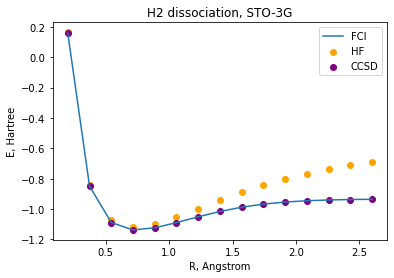

In [24]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [28]:
bond_lengths = np.linspace(0.5,2.7,15)

In [29]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998397 Eh
E = -74.4752320526802 Eh
E = -74.90413378058071 Eh
E = -75.01383133956631 Eh
E = -75.00356512166908 Eh
E = -74.9517086912673 Eh
E = -74.89218648216092 Eh
E = -74.83923063661602 Eh
E = -74.79866365936532 Eh
E = -74.77161515186759 Eh
E = -74.75568947215372 Eh
E = -74.74704715251296 Eh
E = -74.74248898749285 Eh
E = -74.74007426470016 Eh
Could not converge


In [30]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161320598 Eh
E = -74.4534379701182 Eh
E = -74.87055361048849 Eh
E = -74.96308510924636 Eh
E = -74.92817508740464 Eh
E = -74.8428194286347 Eh
E = -74.74051950148908 Eh
E = -74.63577758415673 Eh
E = -74.53576638655936 Eh
E = -74.44494384742802 Eh
E = -74.36975504261416 Eh
E = -74.29778481418667 Eh
E = -74.24167220050471 Eh
E = -74.27129957697572 Eh
Could not converge


In [31]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918692 Eh
E = -74.47519485717137 Eh
E = -74.90406353010559 Eh
E = -75.01370018934792 Eh
E = -75.00330155818898 Eh
E = -74.95116757042628 Eh
E = -74.89128367467835 Eh
E = -74.83853401139102 Eh
E = -74.80070162375993 Eh
E = -74.78105738717369 Eh
E = -74.74394274756706 Eh
E = -74.77972801511784 Eh
E = -74.7833896345308 Eh
E = -74.64224434263224 Eh
Could not converge


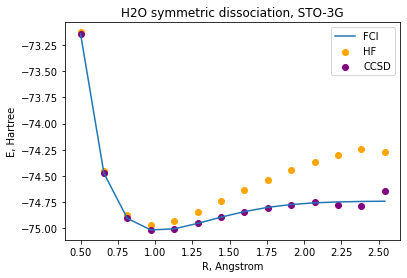

In [32]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## LiH

In [33]:
bond_lengths = np.linspace(0.7,2.8,15)

In [34]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -7.50505176736178 Eh
E = -7.682958063668249 Eh
E = -7.784460280267028 Eh
E = -7.84047262471269 Eh
E = -7.869139976429556 Eh
E = -7.88098231460632 Eh
E = -7.882324378871194 Eh
E = -7.877187002263722 Eh
E = -7.86824079379285 Eh
E = -7.857312838290902 Eh
E = -7.845683623116468 Eh
E = -7.834269137861158 Eh
E = -7.82372388338936 Eh
E = -7.81448216042289 Eh
E = -7.806763402503738 Eh


In [35]:
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -7.486020404066261 Eh
E = -7.665011217030246 Eh
E = -7.767438446509461 Eh
E = -7.823788884619447 Eh
E = -7.852034676377395 Eh
E = -7.86265126612485 Eh
E = -7.861950402903165 Eh
E = -7.853927324256988 Eh
E = -7.841202658643058 Eh
E = -7.825529052317529 Eh
E = -7.808094112982421 Eh
E = -7.7897175691255445 Eh
E = -7.770984662573565 Eh
E = -7.752334573462638 Eh
E = -7.734113419609948 Eh


In [36]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.505041804061131 Eh
E = -7.682951673334853 Eh
E = -7.784453781342632 Eh
E = -7.840465539557141 Eh
E = -7.869131686034386 Eh
E = -7.880972191526 Eh
E = -7.8823120975296215 Eh
E = -7.87717259506206 Eh
E = -7.868224101324973 Eh
E = -7.85729320545045 Eh
E = -7.845659832192269 Eh
E = -7.834239380731086 Eh
E = -7.823685850858567 Eh
E = -7.814433430043016 Eh
E = -7.806702090929699 Eh


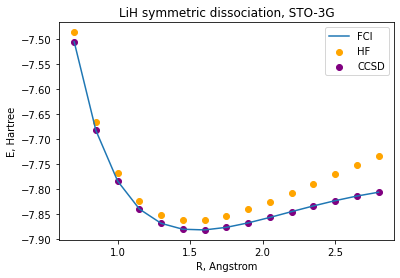

In [37]:
#Plot LiH PESs

plt.title('LiH symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## N<sub>2</sub>

In [4]:
bond_lengths = np.linspace(0.4,2.6,15)

In [5]:
#Run FCI
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')

E = -94.48871038744018 Eh
E = -102.74587535010123 Eh
E = -105.94833375840649 Eh
E = -107.17709480522126 Eh
E = -107.59093448975091 Eh
E = -107.67725541154235 Eh
E = -107.64516856370228 Eh
E = -107.58163492166216 Eh
E = -107.5220945095021 Eh
E = -107.48051971995444 Eh
E = -107.4577494097535 Eh
E = -107.44733496884044 Eh
E = -107.44290541636948 Eh
E = -107.44088363444261 Eh
E = -107.43978533351843 Eh


In [6]:
#Run HF
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')

E = -94.45646415587997 Eh
E = -102.70122574761714 Eh
E = -105.87852515712584 Eh
E = -107.07760196090216 Eh
E = -107.45386359103277 Eh
E = -107.49273853129587 Eh
E = -107.40328534420038 Eh
E = -107.27267306964532 Eh
E = -107.13563711777529 Eh
E = -107.00633206814635 Eh
E = -106.89099807047323 Eh
E = -106.7918397153125 Eh
E = -106.70848596857404 Eh
E = -106.63926199943886 Eh
E = -106.58220314531812 Eh


In [ ]:
#Run CCSD
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

E = -94.48852764403034 Eh
E = -102.74550161896246 Eh
E = -105.94753826181285 Eh
E = -107.17557916331617 Eh
E = -107.58802625580654 Eh
E = -107.67167987895198 Eh
E = -107.63535226021193 Eh
E = -107.56786511076737 Eh
E = -107.51313442279262 Eh
E = -107.50485458486493 Eh


In [ ]:
#Plot N2 PESs

plt.title('N2 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()